In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: d:\Edstem\Python\Python Excercises\pr-venv\Scripts\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

In [11]:
import numpy as np
from datetime import datetime, timedelta

In [12]:
np.random.seed(42)


In [17]:
# Generate product data
def generate_product_data(n_products=100):
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty']
    products = pd.DataFrame({
    'product_id': range(1, n_products + 1),
    'category': np.random.choice(categories, size=n_products),
    'price': np.random.uniform(10, 1000, size=n_products).round(2),
    'stock_level': np.random.randint(0, 200, size=n_products)
    })
    return products

In [19]:
type(generate_product_data)

function

In [23]:
# Generate sales data for 6 months
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
    for date in dates:
# Generate more sales for weekends
        n_sales = np.random.randint(
        50, 100 if date.weekday() >= 5 else 80
        )
        daily_sales = pd.DataFrame({
        'date': [date] * n_sales,
         'product_id': np.random.choice(products['product_id'], size=n_sales),
        'quantity': np.random.randint(1, 5, size=n_sales),
        'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
        })
        sales_list.append(daily_sales)
        sales_df = pd.concat(sales_list, ignore_index=True)
        sales_df['returned'] = np.random.choice(
          [0, 1],
        size=len(sales_df),
        p=[0.95, 0.05] # 5% return rate
        )
        return sales_df
        

In [24]:

# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)

In [25]:
# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)

In [26]:
products_df

,product_id,category,price,stock_level
0,1,Electronics,466.17,171
1,2,Beauty,214.27,129
2,3,Home,370.63,12
3,4,Electronics,508.38,167
4,5,Beauty,693.49,129
...,...,...,...,...
95,96,Clothing,537.26,96
96,97,Beauty,61.31,154
97,98,Beauty,343.24,182
98,99,Electronics,143.07,32


In [27]:
sales_df

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,66,2,0,1
1,2023-07-01,10,4,0,0
2,2023-07-01,5,2,0,0
3,2023-07-01,74,3,0,0
4,2023-07-01,97,1,0,1
...,...,...,...,...,...
66,2023-07-01,23,1,0,0
67,2023-07-01,1,4,1,0
68,2023-07-01,46,2,0,0
69,2023-07-01,21,2,1,0


In [31]:
sales_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

In [32]:
products_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [33]:
products_df.isnull().sum()

product_id     0
category       0
price          0
stock_level    0
dtype: int64

In [37]:
sales_df.isnull().sum()

date                0
product_id          0
quantity            0
discount_applied    0
returned            0
dtype: int64

In [35]:
products_df[["category", "price"]].groupby("category").mean()

,price
category,
Beauty,404.199200
Books,535.202381
Clothing,424.234091
Electronics,371.647222
Home,474.436429


In [36]:
products_df["category"].value_counts()

category
Beauty         25
Clothing       22
Books          21
Electronics    18
Home           14
Name: count, dtype: int64

In [50]:
df_union = pd.concat([sales_df, products_df]).drop_duplicates()

In [52]:
df_union

,date,product_id,quantity,discount_applied,returned,category,price,stock_level
0,2023-07-01,66,2.0,0.0,1.0,NaN,NaN,NaN
1,2023-07-01,10,4.0,0.0,0.0,NaN,NaN,NaN
2,2023-07-01,5,2.0,0.0,0.0,NaN,NaN,NaN
3,2023-07-01,74,3.0,0.0,0.0,NaN,NaN,NaN
4,2023-07-01,97,1.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,NaT,96,NaN,NaN,NaN,Clothing,537.26,96.0
96,NaT,97,NaN,NaN,NaN,Beauty,61.31,154.0
97,NaT,98,NaN,NaN,NaN,Beauty,343.24,182.0
98,NaT,99,NaN,NaN,NaN,Electronics,143.07,32.0


In [59]:
sales_df['net_sales'] = sales_df['quantity'] - sales_df['returned']

In [63]:
sales_df['total_sales'] = sales_df['net_sales'] * products_df.set_index('product_id').loc[sales_df['product_id'], 'price'].values

In [64]:
sales_df['discount_amount'] = sales_df['total_sales'] * sales_df['discount_applied'] * 0.1 

In [65]:
sales_df['revenue_after_discount'] = sales_df['total_sales'] - sales_df['discount_amount']

In [66]:
total_revenue_per_product = sales_df.groupby('product_id')['revenue_after_discount'].sum().reset_index() 

In [67]:
print(total_revenue_per_product)

    product_id  revenue_after_discount
0            1                1678.212
1            2                 214.270
2            5                2080.470
3            6                 146.760
4            8                 631.620
5            9                 327.384
6           10                3499.360
7           11                2672.814
8           12                 126.846
9           13                1278.495
10          15                2252.340
11          20                1866.210
12          21                 675.396
13          23                3750.000
14          26                1289.196
15          27                4033.125
16          29                2093.481
17          31                1811.760
18          36                 137.402
19          37                 887.922
20          38                 657.990
21          40                 347.112
22          41                 891.620
23          43                2524.547
24          45           

In [68]:
top10_revenue = total_revenue_per_product.nlargest(10, 'revenue_after_discount') 

In [69]:
print(top10_revenue)

    product_id  revenue_after_discount
36          74                5818.680
26          47                5417.400
37          76                4094.500
15          27                4033.125
13          23                3750.000
6           10                3499.360
7           11                2672.814
23          43                2524.547
10          15                2252.340
16          29                2093.481


In [71]:
top10_quantity = sales_df.groupby('product_id')['net_sales'].sum().nlargest(10).reset_index() 

In [72]:
print(top10_quantity)

   product_id  net_sales
0          47         10
1          90         10
2          46          6
3          74          6
4          13          5
5          23          5
6          27          5
7          36          5
8          76          5
9           1          4


In [73]:
sales_df['return_rate'] = sales_df['returned'] / sales_df['quantity']

In [74]:
top10_return_rate = sales_df.groupby('product_id')['return_rate'].mean().nsmallest(10).reset_index() 
print(top10_return_rate)

   product_id  return_rate
0           1          0.0
1           2          0.0
2           6          0.0
3           8          0.0
4           9          0.0
5          10          0.0
6          11          0.0
7          13          0.0
8          15          0.0
9          20          0.0


In [75]:
sales_df

,date,product_id,quantity,discount_applied,returned,net_sales,total_sales,discount_amount,revenue_after_discount,return_rate
0,2023-07-01,66,2,0,1,1,181.64,0.000,181.640,0.5
1,2023-07-01,10,4,0,0,4,3499.36,0.000,3499.360,0.0
2,2023-07-01,5,2,0,0,2,1386.98,0.000,1386.980,0.0
3,2023-07-01,74,3,0,0,3,2909.34,0.000,2909.340,0.0
4,2023-07-01,97,1,0,1,0,0.00,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...
66,2023-07-01,23,1,0,0,1,750.00,0.000,750.000,0.0
67,2023-07-01,1,4,1,0,4,1864.68,186.468,1678.212,0.0
68,2023-07-01,46,2,0,0,2,192.10,0.000,192.100,0.0
69,2023-07-01,21,2,1,0,2,750.44,75.044,675.396,0.0


In [79]:
products_df.set_index('product_id', inplace=True)

In [80]:
sales_df['category'] = sales_df['product_id'].map(products_df['category'])

In [81]:
category_revenue = sales_df.groupby('category')['revenue_after_discount'].sum().reset_index() 
print(category_revenue)

      category  revenue_after_discount
0       Beauty               19080.512
1        Books               16545.435
2     Clothing               15469.838
3  Electronics                9038.492
4         Home                5301.563


In [82]:
category_avg = sales_df.groupby('category')['revenue_after_discount'].mean().reset_index() 
print(category_avg)

      category  revenue_after_discount
0       Beauty              763.220480
1        Books             1272.725769
2     Clothing              909.990471
3  Electronics             1004.276889
4         Home              757.366143


In [84]:
category_return_rates = sales_df.groupby('category')['return_rate'].sum().reset_index() 
print(category_return_rates)

      category  return_rate
0       Beauty     2.000000
1        Books     0.000000
2     Clothing     0.333333
3  Electronics     1.500000
4         Home     0.000000


In [85]:
category_dicount_impact = sales_df.groupby('category')['discount_amount'].sum().reset_index() 
print(category_dicount_impact)

      category  discount_amount
0       Beauty          443.628
1        Books          404.825
2     Clothing          820.232
3  Electronics          244.058
4         Home          152.187


In [87]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 6.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.8 MB 6.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 6.3 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 6.1 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------ ---------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: d:\Edstem\Python\Python Excercises\pr-venv\Scripts\python.exe -m pip install --upgrade pip


In [88]:
import matplotlib.pyplot as plt

<Axes: >

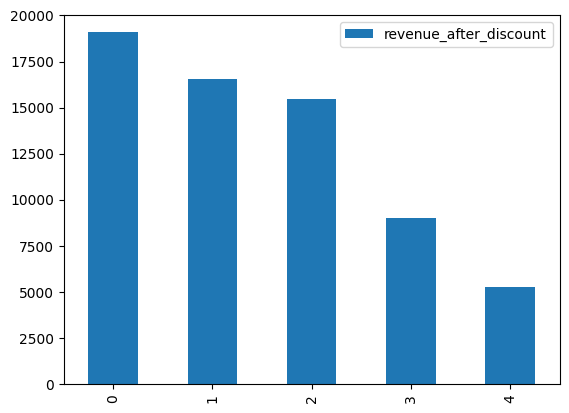

In [90]:
category_revenue.plot.bar()